<a href="https://colab.research.google.com/github/pwongsut/DNN_Lensing/blob/master/Lensing_Dnn_Regression_Grid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving griddata_n02.csv to griddata_n02.csv
User uploaded file "griddata_n02.csv" with length 150458480 bytes


In [0]:
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.3f}'.format

#TODO: Change file name to match the uploaded file
filename = "griddata_n02.csv"

dimension = 16*16
my_dataframe = pd.read_csv(filename)
my_dataframe[list(my_dataframe)[0:dimension]].describe()

,n_0_0,n_0_1,n_0_2,n_0_3,n_0_4,n_0_5,n_0_6,n_0_7,n_0_8,n_0_9,n_0_10,n_0_11,n_0_12,n_0_13,n_0_14,n_0_15,n_1_0,n_1_1,n_1_2,n_1_3,n_1_4,n_1_5,n_1_6,n_1_7,n_1_8,n_1_9,n_1_10,n_1_11,n_1_12,n_1_13,n_1_14,n_1_15,n_2_0,n_2_1,n_2_2,n_2_3,n_2_4,n_2_5,n_2_6,n_2_7,n_2_8,n_2_9,n_2_10,n_2_11,n_2_12,n_2_13,n_2_14,n_2_15,n_3_0,n_3_1,...,n_12_14,n_12_15,n_13_0,n_13_1,n_13_2,n_13_3,n_13_4,n_13_5,n_13_6,n_13_7,n_13_8,n_13_9,n_13_10,n_13_11,n_13_12,n_13_13,n_13_14,n_13_15,n_14_0,n_14_1,n_14_2,n_14_3,n_14_4,n_14_5,n_14_6,n_14_7,n_14_8,n_14_9,n_14_10,n_14_11,n_14_12,n_14_13,n_14_14,n_14_15,n_15_0,n_15_1,n_15_2,n_15_3,n_15_4,n_15_5,n_15_6,n_15_7,n_15_8,n_15_9,n_15_10,n_15_11,n_15_12,n_15_13,n_15_14,n_15_15
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,...,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,0.000,0.000,0.000,0.000,1.489,4.628,6.710,7.625,7.651,6.702,4.620,1.474,0.000,0.000,0.000,0.000,0.000,0.000,0.282,4.676,7.752,7.772,7.792,7.802,7.764,7.747,7.819,7.808,4.745,0.285,0.000,0.000,0.000,0.287,5.912,7.783,7.824,7.853,7.842,7.778,7.864,7.803,7.848,7.809,7.827,5.902,0.279,0.000,0.000,4.738,...,4.762,0.000,0.000,0.281,5.904,7.814,7.804,7.806,7.832,7.835,7.852,7.771,7.826,7.774,7.757,5.898,0.286,0.000,0.000,0.000,0.294,4.735,7.745,7.833,7.857,7.804,7.830,7.784,7.864,7.766,4.740,0.288,0.000,0.000,0.000,0.000,0.000,0.000,1.481,4.589,6.663,7.659,7.635,6.625,4.618,1.466,0.000,0.000,0.000,0.000
std,0.000,0.000,0.000,0.000,1.220,2.152,2.556,2.767,2.736,2.574,2.123,1.211,0.000,0.000,0.000,0.000,0.000,0.000,0.533,2.161,2.799,2.829,2.781,2.778,2.794,2.779,2.762,2.790,2.186,0.531,0.000,0.000,0.000,0.533,2.432,2.796,2.784,2.826,2.779,2.773,2.854,2.795,2.816,2.815,2.779,2.405,0.532,0.000,0.000,2.161,...,2.173,0.000,0.000,0.527,2.418,2.828,2.779,2.777,2.760,2.805,2.800,2.779,2.814,2.792,2.768,2.407,0.536,0.000,0.000,0.000,0.543,2.164,2.815,2.808,2.807,2.771,2.780,2.767,2.817,2.788,2.206,0.532,0.000,0.000,0.000,0.000,0.000,0.000,1.220,2.126,2.590,2.745,2.752,2.573,2.136,1.204,0.000,0.000,0.000,0.000
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,1.000,3.000,5.000,6.000,6.000,5.000,3.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,3.000,0.000,0.000,0.000,0.000,0.000,4.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,4.000,0.000,0.000,0.000,3.000,...,3.000,0.000,0.000,0.000,4.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,4.000,0.000,0.000,0.000,0.000,0.000,3.000,6.000,6.000,6.000,6.000,6.000,6.

In [0]:
def preprocess_features(dataframe):
  """Prepares input features.

  Args:
    dataframe: A Pandas DataFrame expected to contain the data.
  Returns:
    A DataFrame that contains the features to be used for the model.
  """
  keyword = "e1"
  selected_features = dataframe[[ header for header in list(dataframe) if keyword in header ]]
  return selected_features

def preprocess_targets(dataframe):
  """Prepares target features (i.e., labels).

  Args:
    dataframe: A Pandas DataFrame expected to contain data.
  Returns:
    A DataFrame that contains the target feature.
  """
  output_targets = pd.DataFrame()
  # Scale the target to be in units of 1e15 MSun.
  output_targets["M200"] = (dataframe["M200"] / 1e15)
  return output_targets

In [0]:
# Check for Nan
print(pd.isna(my_dataframe).any(axis=0).any())

# Remove column with all zeros and replace remaining zeros with mean. 
# Do only once since it is time consuming.
my_dataframe = my_dataframe.loc[:, (my_dataframe != 0).any(axis=0)]
my_dataframe = my_dataframe.replace(0,my_dataframe.mean())

False


In [0]:
# Shuffle data
my_dataframe = my_dataframe.iloc[np.random.permutation(len(my_dataframe))]

# Choose the first 6000 (out of 10000) examples for training.
training_examples = preprocess_features(my_dataframe.head(6000))
training_targets = preprocess_targets(my_dataframe.head(6000))

# Choose the 6001-8000 examples for validation.
validation_examples = preprocess_features(my_dataframe.iloc[6000:8000])
validation_targets = preprocess_targets(my_dataframe.iloc[6000:8000])

# Double-check that we've done the right thing.
print("Training examples summary:")
display.display(training_examples.describe())
print("Validation examples summary:")
display.display(validation_examples.describe())

print("Training targets summary:")
display.display(training_targets.describe())
print("Validation targets summary:")
display.display(validation_targets.describe())

Training examples summary:


,e1_0_4,e1_0_5,e1_0_6,e1_0_7,e1_0_8,e1_0_9,e1_0_10,e1_0_11,e1_1_2,e1_1_3,e1_1_4,e1_1_5,e1_1_6,e1_1_7,e1_1_8,e1_1_9,e1_1_10,e1_1_11,e1_1_12,e1_1_13,e1_2_1,e1_2_2,e1_2_3,e1_2_4,e1_2_5,e1_2_6,e1_2_7,e1_2_8,e1_2_9,e1_2_10,e1_2_11,e1_2_12,e1_2_13,e1_2_14,e1_3_1,e1_3_2,e1_3_3,e1_3_4,e1_3_5,e1_3_6,e1_3_7,e1_3_8,e1_3_9,e1_3_10,e1_3_11,e1_3_12,e1_3_13,e1_3_14,e1_4_0,e1_4_1,...,e1_11_14,e1_11_15,e1_12_1,e1_12_2,e1_12_3,e1_12_4,e1_12_5,e1_12_6,e1_12_7,e1_12_8,e1_12_9,e1_12_10,e1_12_11,e1_12_12,e1_12_13,e1_12_14,e1_13_1,e1_13_2,e1_13_3,e1_13_4,e1_13_5,e1_13_6,e1_13_7,e1_13_8,e1_13_9,e1_13_10,e1_13_11,e1_13_12,e1_13_13,e1_13_14,e1_14_2,e1_14_3,e1_14_4,e1_14_5,e1_14_6,e1_14_7,e1_14_8,e1_14_9,e1_14_10,e1_14_11,e1_14_12,e1_14_13,e1_15_4,e1_15_5,e1_15_6,e1_15_7,e1_15_8,e1_15_9,e1_15_10,e1_15_11
count,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,...,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000,6000.000
mean,0.026,0.027,0.028,0.028,0.028,0.029,0.029,0.026,0.012,0.027,0.030,0.031,0.033,0.034,0.034,0.033,0.031,0.029,0.028,0.013,0.012,0.028,0.031,0.034,0.037,0.038,0.040,0.040,0.039,0.036,0.033,0.031,0.027,0.011,0.027,0.031,0.035,0.039,0.044,0.048,0.049,0.049,0.047,0.044,0.039,0.035,0.031,0.028,0.026,0.029,...,0.029,0.026,0.028,0.030,0.034,0.039,0.043,0.047,0.050,0.050,0.047,0.043,0.039,0.035,0.031,0.027,0.012,0.028,0.030,0.034,0.037,0.039,0.040,0.040,0.039,0.037,0.034,0.030,0.028,0.011,0.012,0.028,0.030,0.031,0.032,0.034,0.034,0.033,0.031,0.029,0.027,0.012,0.026,0.027,0.028,0.029,0.029,0.029,0.028,0.026
std,0.055,0.043,0.037,0.036,0.036,0.037,0.043,0.054,0.037,0.043,0.036,0.037,0.037,0.038,0.038,0.038,0.036,0.035,0.043,0.037,0.037,0.038,0.036,0.037,0.040,0.040,0.041,0.042,0.040,0.039,0.038,0.036,0.038,0.036,0.042,0.036,0.038,0.040,0.043,0.045,0.045,0.045,0.044,0.042,0.040,0.039,0.036,0.043,0.054,0.036,...,0.035,0.055,0.043,0.036,0.037,0.040,0.043,0.044,0.046,0.046,0.044,0.043,0.040,0.038,0.037,0.042,0.037,0.039,0.036,0.038,0.039,0.040,0.041,0.041,0.040,0.039,0.037,0.036,0.039,0.036,0.036,0.043,0.036,0.036,0.037,0.038,0.038,0.038,0.036,0.036,0.043,0.037,0.054,0.043,0.037,0.036,0.035,0.038,0.043,0.055
min,-0.132,-0.133,-0.106,-0.119,-0.126,-0.126,-0.127,-0.133,-0.135,-0.131,-0.104,-0.134,-0.109,-0.115,-0.111,-0.092,-0.115,-0.134,-0.135,-0.134,-0.128,-0.111,-0.105,-0.126,-0.105,-0.095,-0.093,-0.120,-0.095,-0.100,-0.098,-0.130,-0.124,-0.135,-0.131,-0.123,-0.095,-0.095,-0.095,-0.112,-0.116,-0.104,-0.113,-0.110,-0.134,-0.128,-0.123,-0.129,-0.133,-0.100,...,-0.109,-0.136,-0.130,-0.116,-0.113,-0.108,-0.121,-0.108,-0.108,-0.096,-0.109,-0.116,-0.105,-0.110,-0.128,-0.135,-0.136,-0.120,-0.118,-0.099,-0.094,-0.119,-0.121,-0.117,-0.117,-0.119,-0.109,-0.097,-0.136,-0.135,-0.134,-0.130,-0.119,-0.113,-0.081,-0.096,-0.091,-0.102,-0.106,-0.112,-0.123,-0.135,-0.136,-0.133,-0.119,-0.113,-0.124,-0.131,-0.130,-0.133
25%,0.001,-0.001,0.002,0.003,0.004,0.003,0.000,0.001,0.007,-0.000,0.005,0.005,0.007,0.007,0.008,0.007,0.006,0.005,0.001,0.007,0.007,0.002,0.006,0.008,0.009,0.011,0.011,0.011,0.011,0.009,0.007,0.006,0.002,0.006,-0.000,0.006,0.008,0.012,0.013,0.015,0.017,0.017,0.015,0.014,0.011,0.008,0.006,0.000,0.001,0.005,...,0.005,-0.000,-0.000,0.005,0.009,0.010,0.012,0.015,0.017,0.017,0.0

Validation examples summary:


,e1_0_4,e1_0_5,e1_0_6,e1_0_7,e1_0_8,e1_0_9,e1_0_10,e1_0_11,e1_1_2,e1_1_3,e1_1_4,e1_1_5,e1_1_6,e1_1_7,e1_1_8,e1_1_9,e1_1_10,e1_1_11,e1_1_12,e1_1_13,e1_2_1,e1_2_2,e1_2_3,e1_2_4,e1_2_5,e1_2_6,e1_2_7,e1_2_8,e1_2_9,e1_2_10,e1_2_11,e1_2_12,e1_2_13,e1_2_14,e1_3_1,e1_3_2,e1_3_3,e1_3_4,e1_3_5,e1_3_6,e1_3_7,e1_3_8,e1_3_9,e1_3_10,e1_3_11,e1_3_12,e1_3_13,e1_3_14,e1_4_0,e1_4_1,...,e1_11_14,e1_11_15,e1_12_1,e1_12_2,e1_12_3,e1_12_4,e1_12_5,e1_12_6,e1_12_7,e1_12_8,e1_12_9,e1_12_10,e1_12_11,e1_12_12,e1_12_13,e1_12_14,e1_13_1,e1_13_2,e1_13_3,e1_13_4,e1_13_5,e1_13_6,e1_13_7,e1_13_8,e1_13_9,e1_13_10,e1_13_11,e1_13_12,e1_13_13,e1_13_14,e1_14_2,e1_14_3,e1_14_4,e1_14_5,e1_14_6,e1_14_7,e1_14_8,e1_14_9,e1_14_10,e1_14_11,e1_14_12,e1_14_13,e1_15_4,e1_15_5,e1_15_6,e1_15_7,e1_15_8,e1_15_9,e1_15_10,e1_15_11
count,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,...,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000
mean,0.026,0.028,0.029,0.028,0.028,0.028,0.028,0.024,0.013,0.027,0.030,0.031,0.033,0.034,0.034,0.033,0.031,0.029,0.029,0.011,0.012,0.028,0.030,0.033,0.037,0.040,0.040,0.041,0.039,0.036,0.033,0.031,0.029,0.012,0.027,0.031,0.035,0.040,0.044,0.047,0.049,0.050,0.048,0.043,0.038,0.034,0.031,0.026,0.028,0.029,...,0.029,0.025,0.027,0.031,0.034,0.038,0.043,0.047,0.050,0.051,0.047,0.044,0.038,0.035,0.031,0.027,0.012,0.029,0.030,0.033,0.036,0.039,0.040,0.041,0.039,0.037,0.033,0.030,0.027,0.011,0.012,0.029,0.030,0.032,0.033,0.034,0.034,0.033,0.032,0.030,0.028,0.012,0.025,0.028,0.029,0.029,0.028,0.029,0.028,0.027
std,0.054,0.044,0.037,0.035,0.035,0.038,0.044,0.055,0.038,0.042,0.035,0.037,0.037,0.038,0.037,0.038,0.036,0.036,0.041,0.037,0.038,0.039,0.036,0.038,0.038,0.040,0.042,0.041,0.041,0.039,0.039,0.037,0.038,0.037,0.043,0.036,0.038,0.040,0.043,0.044,0.045,0.045,0.045,0.042,0.041,0.038,0.036,0.043,0.053,0.034,...,0.035,0.054,0.042,0.035,0.038,0.040,0.043,0.043,0.045,0.046,0.044,0.042,0.041,0.038,0.037,0.041,0.037,0.038,0.035,0.038,0.039,0.039,0.041,0.040,0.040,0.039,0.038,0.037,0.039,0.036,0.038,0.042,0.037,0.036,0.037,0.037,0.037,0.037,0.036,0.035,0.041,0.037,0.052,0.044,0.037,0.035,0.035,0.038,0.042,0.053
min,-0.136,-0.134,-0.089,-0.098,-0.117,-0.095,-0.127,-0.130,-0.134,-0.133,-0.070,-0.115,-0.128,-0.088,-0.078,-0.083,-0.079,-0.086,-0.131,-0.135,-0.128,-0.111,-0.098,-0.097,-0.078,-0.098,-0.084,-0.091,-0.099,-0.083,-0.108,-0.101,-0.133,-0.133,-0.133,-0.081,-0.119,-0.070,-0.089,-0.066,-0.087,-0.074,-0.082,-0.085,-0.109,-0.081,-0.096,-0.110,-0.136,-0.069,...,-0.101,-0.131,-0.121,-0.102,-0.077,-0.094,-0.068,-0.076,-0.096,-0.068,-0.102,-0.086,-0.084,-0.107,-0.087,-0.125,-0.135,-0.114,-0.074,-0.075,-0.097,-0.087,-0.089,-0.089,-0.121,-0.082,-0.098,-0.121,-0.109,-0.134,-0.134,-0.109,-0.132,-0.110,-0.083,-0.084,-0.076,-0.077,-0.094,-0.120,-0.108,-0.128,-0.129,-0.127,-0.104,-0.113,-0.081,-0.115,-0.116,-0.137
25%,-0.002,0.000,0.004,0.003,0.004,0.002,-0.001,-0.000,0.007,-0.002,0.004,0.004,0.008,0.008,0.008,0.006,0.006,0.005,0.003,0.007,0.007,0.001,0.005,0.007,0.010,0.013,0.010,0.011,0.009,0.008,0.007,0.006,0.003,0.006,-0.002,0.007,0.008,0.011,0.014,0.015,0.016,0.017,0.016,0.014,0.009,0.008,0.007,-0.001,0.004,0.006,...,0.004,-0.000,-0.000,0.007,0.008,0.010,0.014,0.015,0.018,0.017,

Training targets summary:


,M200
count,6000.000
mean,1.246
std,1.265
min,0.100
25%,0.262
50%,0.694
75%,1.880
max,5.008


Validation targets summary:


,M200
count,2000.000
mean,1.250
std,1.256
min,0.100
25%,0.259
50%,0.729
75%,1.913
max,4.990


In [0]:
def construct_feature_columns(input_features):
  """Construct the TensorFlow Feature Columns.

  Args:
    input_features: The names of the numerical input features to use.
  Returns:
    A set of feature columns
  """ 
  return set([tf.feature_column.numeric_column(my_feature)
              for my_feature in input_features])

def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a neural net regression model.
  
    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """
    
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                             
 
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified.
    if shuffle:
      ds = ds.shuffle(10000)
    
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels
  
def train_nn_regression_model(
    learning_rate,
    steps,
    batch_size,
    hidden_units,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets,
    continued=False,
    prev_regressor=None,
    prev_training_rmse=None,
    prev_validation_rmse=None):
  """Trains a neural network regression model.
  
  In addition to training, this function also prints training progress information,
  as well as a plot of the training and validation loss over time.
  
  Args:
    learning_rate: A `float`, the learning rate.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    batch_size: A non-zero `int`, the batch size.
    hidden_units: A `list` of int values, specifying the number of neurons in each layer.
    training_examples: A `DataFrame` containing one or more columns from
      `california_housing_dataframe` to use as input features for training.
    training_targets: A `DataFrame` containing exactly one column from
      `california_housing_dataframe` to use as target for training.
    validation_examples: A `DataFrame` containing one or more columns from
      `california_housing_dataframe` to use as input features for validation.
    validation_targets: A `DataFrame` containing exactly one column from
      `california_housing_dataframe` to use as target for validation.
      
  Returns:
    A `DNNRegressor` object trained on the training data.
  """

  periods = 16
  steps_per_period = steps / periods
  
  # Create a DNNRegressor object.
  my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
  my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
  if continued:
      dnn_regressor = prev_regressor
  else:
      dnn_regressor = tf.estimator.DNNRegressor(
          feature_columns=construct_feature_columns(training_examples),
          hidden_units=hidden_units,
          optimizer=my_optimizer,
      )
  
  # Create input functions.
  training_input_fn = lambda: my_input_fn(training_examples, 
                                          training_targets["M200"], 
                                          batch_size=batch_size)
  predict_training_input_fn = lambda: my_input_fn(training_examples, 
                                                  training_targets["M200"], 
                                                  num_epochs=1, 
                                                  shuffle=False)
  predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                    validation_targets["M200"], 
                                                    num_epochs=1, 
                                                    shuffle=False)

  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
  print("Training model...")
  print("RMSE (on training data):")
  training_rmse = []
  validation_rmse = []
  if continued:
    training_rmse = prev_training_rmse
    validation_rmse = prev_validation_rmse
  for period in range (0, periods):
    # Train the model, starting from the prior state.
    dnn_regressor.train(
        input_fn=training_input_fn,
        steps=steps_per_period
    )
    # Take a break and compute predictions.
    training_predictions = dnn_regressor.predict(input_fn=predict_training_input_fn)
    training_predictions = np.array([item['predictions'][0] for item in training_predictions])
    
    validation_predictions = dnn_regressor.predict(input_fn=predict_validation_input_fn)
    validation_predictions = np.array([item['predictions'][0] for item in validation_predictions])
    
    # Compute training and validation loss.
    training_root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(training_predictions, training_targets))
    validation_root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(validation_predictions, validation_targets))
    # Occasionally print the current loss.
    print("  period %02d : %0.3f" % (period, training_root_mean_squared_error))
    # Add the loss metrics from this period to our list.
    training_rmse.append(training_root_mean_squared_error)
    validation_rmse.append(validation_root_mean_squared_error)
  print("Model training finished.")

  # Output a graph of loss metrics over periods.
  plt.ylabel("RMSE")
  plt.xlabel("Periods")
  plt.title("Root Mean Squared Error vs. Periods")
  plt.tight_layout()
  plt.plot(training_rmse, label="training")
  plt.plot(validation_rmse, label="validation")
  plt.legend()

  print("Final RMSE (on training data):   %0.3f" % training_root_mean_squared_error)
  print("Final RMSE (on validation data): %0.3f" % validation_root_mean_squared_error)

  return dnn_regressor, training_rmse, validation_rmse

Training model...
RMSE (on training data):
  period 00 : 1.044
  period 01 : 0.493
  period 02 : 0.151
  period 03 : 0.101
  period 04 : 0.087
  period 05 : 0.080
  period 06 : 0.076
  period 07 : 0.074
  period 08 : 0.078
  period 09 : 0.071
  period 10 : 0.069
  period 11 : 0.067
  period 12 : 0.067
  period 13 : 0.066
  period 14 : 0.065
  period 15 : 0.065
Model training finished.
Final RMSE (on training data):   0.065
Final RMSE (on validation data): 0.068


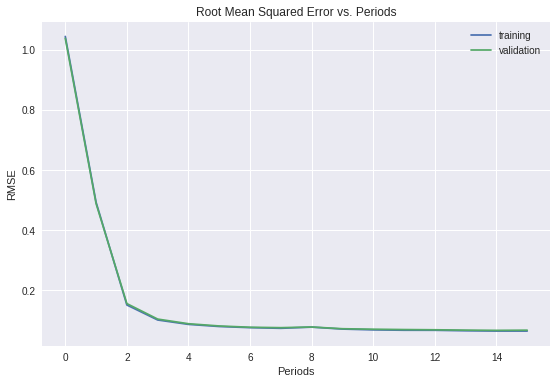

In [0]:
#---------------Start training the model---------------------
'''
default hyperparameters
    learning_rate=0.001,
    steps=2000,
    batch_size=150,
    hidden_units=[100, 50]
'''
learning_rate=0.001
steps=2000
batch_size=150
hidden_units=[100, 50]

dnn_regressor, training_rmse, validation_rmse = train_nn_regression_model(
    learning_rate=learning_rate,
    steps=steps,
    batch_size=batch_size,
    hidden_units=hidden_units,
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

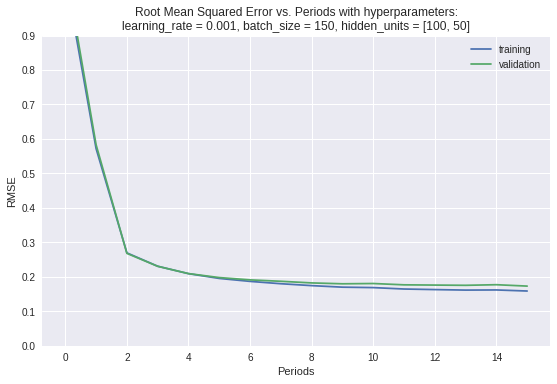

In [0]:
#Plot RMSE vs periods
plt.ylabel("RMSE")
plt.xlabel("Periods")
plt.title("Root Mean Squared Error vs. Periods with hyperparameters:\nlearning_rate = %g, batch_size = %d, hidden_units = " % (learning_rate,batch_size)+str(hidden_units))
plt.tight_layout()
plt.plot(training_rmse, label="training")
plt.plot(validation_rmse, label="validation")
plt.ylim([0.0,0.9])
plt.legend()


In [0]:
#Continue training using previous dnn_regressor object
dnn_regressor, training_rmse, validation_rmse = train_nn_regression_model(
    learning_rate=learning_rate,
    steps=steps,
    batch_size=batch_size,
    hidden_units=hidden_units,
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets,
    continued=True,
    prev_regressor=dnn_regressor,
    prev_training_rmse=training_rmse,
    prev_validation_rmse=validation_rmse)

In [0]:
#-------------------Testing the model on a test set-----------------------------

test_examples = preprocess_features(my_dataframe.tail(2000))
test_targets = preprocess_targets(my_dataframe.tail(2000))

predict_testing_input_fn = lambda: my_input_fn(test_examples, 
                                               test_targets["M200"], 
                                               num_epochs=1, 
                                               shuffle=False)

test_predictions = dnn_regressor.predict(input_fn=predict_testing_input_fn)
test_predictions = np.array([item['predictions'][0] for item in test_predictions])

root_mean_squared_error = math.sqrt(
    metrics.mean_squared_error(test_predictions, test_targets))

print("Final RMSE (on test data): %0.3f" % root_mean_squared_error)

In [0]:
#Show final rmse
print(training_rmse[-1])
print(validation_rmse[-1])

In [0]:
with open("savedata.txt",'w') as f:
  content = [training_rmse,validation_rmse]
  content = [ str(line)+"\t" for line in content ]
  f.writelines(content)
files.download('savedata.txt')